# TensorFlow 기초

## 텐서프롤의 특징
- 기본적으로 텐서를 활용한 그래프 수치 연산을 하는 도구
- 수학적인 의미에서의 그래프 : 노드와 엣지로 구성된 기하 모형
- 노드(node) : 연산 및 데이터를 정의하는 것
- 엣지(edge) : 노드들을 연결하는 것(데이터의 흐름)
- 텐서(Tensor) : 다차원 데이터 배열
- 텐서플로 - 텐서가 노드에서 연산되고 엣지를 통해 돌아다닌다

## 텐서플로의 기본 문법
- Session
    - 그래프를 만드는 작업(실행하는 것은 아님)
    - 그래프를 만든 이후 Session을 생성하여 실행시켜야 그래프의 시작점부터 모든 연산을 하게 되고 동작을 하게 됨
    - Session을 실행시키면 엣지를 통해 데이터들이 출력됨
    - 그래프를 만들고(모델링) Session을 만들어 실행시켜야 노드가 엣지를 타고 이동하면서 원하는 형태로 코드가 동작됨

- Fetch : 코드에서 데이터값을 미리 정하는 것
    - Feed : Placeholder 등을 통해 데이터값 없이 구조를 만들고 세션을 실행할 경우 feed_dict을 통해 데이터를 전달
    - placeholder : 노드에 들어갈 데이터의 형식을 미리 정해 놓는 형태

- 변수와 상수
    - variable : 학습시키면서 최적화하는 변수의 용도로 사용됨(학습과정에서 지속적으로 바뀔 수 있는 중요한 값)
    - constant : 상수
    - 변수의 선언 : tf.Variable(초기값, 타입)
    - 변수의 초기화 
        - tf.global_variables_initializer()를 통해 초기화할 수 있음
        - 변수는 반드시 초기화를 해야 함
        - 초기화는 노드에 값을 입력한다는 의미
    - placeholder
        - 주로 입력 데이터를 활용하는 용도로 사용됨
        - feed_dict을 통해 그래프에 데이터를 흐르게 하기 위한 용도
        
## 텐서플로의 주요 개념
- 오퍼레이션(Operation)
    - 그래프 상의 노드
    - 하나 이상의 텐서를 받을 수 있음
    - 계산을 수행하고 결과를 하나 이상의 텐서로 리턴
    
- 텐서(Tensor)
    - 일종의 다차원 배열
    - 내부적으로 모든 데이터는 텐서를 통해 표현됨
    - 그래프 내의 오퍼레이션 간에는 텐서만이 전달됨
    
- 세션(Session)
    - 그래프를 실행하기 위해서 필요한 객체
    
- 변수(Variables)
    - 그래프의 실행시 파라미터를 저장하고 갱신하는데 사용됨
    - 메모리 상에서 텐서를 저장하는 버퍼 역할

In [1]:
import tensorflow as tf
import sys
print(sys.version) # python version
print(tf.__version__) # tensorflow version

3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1.13.1


In [2]:
# 상수 선언
hello = tf.constant("Hello World")
# 이 순간에 출력되지 않음(텐서플로우 자료형 정보만 출력됨, 그래프 형태만 출력됨)
# Session 객체를 만들고 run() method를 호출해야 처리됨
# 모델 구성 단계와 실행 단계가 구분됨
print(hello)
a = tf.constant(10)
b = tf.constant(32)
# c = tf.add(a, b)
c = a + b
print(c)

Tensor("Const:0", shape=(), dtype=string)
Tensor("add:0", shape=(), dtype=int32)


In [3]:
# 그래프를 실행할 세션을 생성
sess = tf.Session()
# 세션.run() : 텐서 그래프(변수, 수식)를 실행
# 문자열은 unicode가 기본이기에 str() 함수로 encoding 처리를 해야
# bytes type이 아닌 Unicode type으로 변환됨
print(sess.run(hello))
print(str(sess.run(hello), encoding = "utf-8"))
print(sess.run([a, b, c]))
# 세션 종료
sess.close()

b'Hello World'
Hello World
[10, 32, 42]


In [4]:
node1 = tf.constant(3.0)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)
with tf.Session() as sess:
    print("node3:", node3)
    print("sess.run(node3):", sess.run(node3))

node3: Tensor("Add_1:0", shape=(), dtype=float32)
sess.run(node3): 7.0


In [5]:
# 플레이스홀더 : 그래프의 입력 변수
input01 = tf.placeholder(tf.float32)
input02 = tf.placeholder(tf.float32)
output = tf.multiply(input01, input02)
with tf.Session() as sess:
    print(sess.run(output, feed_dict={input01:3.0, input02:5.0}))
    print(sess.run(output, feed_dict={input01:0.0, input02:6.0}))
    print(sess.run(output, feed_dict={input01:[2.0], input02:[6.0]}))

# 같은 그래프 구조에 feed_dict = {} 구문을 활용하여 데이터를 입력
# 데이터에 따른 다른 실행 결과를 확인할 수 있음

15.0
0.0
[12.]


In [6]:
# 텐서플로의 변수 선언
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = tf.multiply(W, tf.add(x,b))

# 변수를 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    sess.run(init)
    result = sess.run(linear_model, feed_dict = {x: [1, 2, 3, 4]})
    
print(result, type(result))

# x의 값에 따라 linear_model 계산
# 결과를 numpy.ndarray로 리턴
x = tf.placeholder(tf.float32)
linear_model = tf.multiply(W, tf.add(x,b))
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    result = sess.run(linear_model, feed_dict={x: [1, 2, 3, 4]})
    
print(result, type(result))

Instructions for updating:
Colocations handled automatically by placer.
[0.21000001 0.51000005 0.81000006 1.11      ] <class 'numpy.ndarray'>
[0.21000001 0.51000005 0.81000006 1.11      ] <class 'numpy.ndarray'>


In [7]:
# 플레이스홀더와 변수의 개념
# tf.placeholder : 계산을 실행할 때 입력값을 받는 변수
# None : 크기가 정해지지 않았음을 의미
X = tf.placeholder(tf.float32, [None, 3])
print(X)

# X 플레이스홀더에 넣을 값
# 두번째 차원의 요소의 갯수는 3개
x_data = [[1, 2, 3], [4, 5, 6]]

# tf.Variable() : 그래프를 계산하면서 최적화할 변수
# tf.random_normal() : 각 변수들의 초기값을 정규분포 랜덤값으로 초기화
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([2, 1]))

# 입력값과 변수들을 계산할 수식 작성
# tf.matmul 처럼 mat으로 시작하는 함수로 행렬 계산 수행
# 행렬 곱셈
expr = tf.matmul(X, W) + b
sess = tf.Session()

# 변수 초기화
sess.run(tf.global_variables_initializer())

print(x_data)
print(sess.run(W))
print(sess.run(b))

# 수식에 값을 전달하는 방법
# 세션.run(수식, feed_dict={변수: 값})
print(sess.run(expr, feed_dict={X: x_data}))
# 세션 종료
sess.close()

Tensor("Placeholder_4:0", shape=(?, 3), dtype=float32)
[[1, 2, 3], [4, 5, 6]]
[[-1.0942562  -0.16240121]
 [ 0.03291985 -0.99988663]
 [-0.09245674  1.6286752 ]]
[[-1.6934958]
 [ 1.0859917]]
[[-2.9992824  1.0303552]
 [-3.6811738  5.209005 ]]


In [8]:
# 구구단 예제
def gugu(dan):
    # 플레이스홀더 선언(그래프에 입력할 변수)
    left = tf.placeholder(tf.int32)
    right = tf.placeholder(tf.int32)
    
    # 그래프의 수식
    calc = tf.multiply(left, right)
    
    with tf.Session() as sess: # 세션이 생성됨
        # 변수 초기화
        sess.run(tf.global_variables_initializer())
        
        for i in range(1, 10):
            # 세션.run(실행할함수, feed_dict={변수: 입력할값})
            result = sess.run(calc, feed_dict={left: dan, right: i})
            print("{0} X {1} = {2:2}".format(dan, i, result))


In [9]:
gugu(7)

7 X 1 =  7
7 X 2 = 14
7 X 3 = 21
7 X 4 = 28
7 X 5 = 35
7 X 6 = 42
7 X 7 = 49
7 X 8 = 56
7 X 9 = 63


In [10]:
from matplotlib import pyplot as plt
from matplotlib import rc


# 한글 처리를 위해 폰트 설정
rc('font', family='AppleGothic')
# 음수 부호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

In [11]:
# 파라미터 설정(실험을 통해 구해야 하는 값)
learning_rate = 0.01 # 학습률
epochs = 1000 # 학습횟수
step_display = 50 # 진행 상태를 출력할 단계

In [12]:
# 회귀분석 : 전기생산량과 소비량
# 월별 전기생산금액(억원)
x = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
# 월별 전기 사용량(백만kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

In [13]:
# 가중치(weight)와 절편(bias)
# tf.random_uniform([1] 변수의 형태, -1.0 최솟값, 1.0 최댓값) 무작위수
# -1.0 ~ 1.0 사이의 값 생성
# name: 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙임
weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="weight")
bias = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="bias")

In [14]:
# placeholder : 학습용 데이터를 담는 그릇
# 그래프에서 x(입력값)을 저장하는 저장소
# placeholder(dtype, shape, name) : 자료형, 행렬의 차원, placeholder의 이름
# 그래프를 구축할 때는 메모리에 저장하지 않고
# 그래프를 실행할 때 피드하면서 메모리에 저장됨
X = tf.placeholder(dtype=tf.float32, name="X")
Y = tf.placeholder(dtype=tf.float32, name="Y")

In [15]:
# X와 Y의 상관 관계를 분석하기 위한 가설 수식 작성
# y = W * x + b
# W와 X가 행렬이 아니므로 tf.matmul이 아니라 기본 곱셈 기호를 사용
h0 = weight * X + bias

In [16]:
y_pred = tf.add(tf.multiply(weight, X), bias)
# 손실함수(비용함수) : 예측값과 실제값의 거리를 계산하는 함수
cost = tf.reduce_mean(tf.square(y_pred - Y))
# 비용을 최소화시킴
# AdamOptimizer : 현존하는 알고리즘 중에서 가장 성능이 뛰어나다고 함
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [17]:
# 변수 초기화
init = tf.global_variables_initializer()
# 세션 생성 및 시작
sess = tf.Session()
sess.run(init)

In [18]:
# optimizer와 cost를 그래프에서 계산
# 계산을 위해 필요한 값은 feed_dict을 통해 전달함
# placeholder인 x, y에 데이터를 계속 넣어줄 자료를 작성해줍니다.
# cost 계산 : 정해진 데이터셋에서 한 샘플씩 불러와서 cost를 계산.
# optimizer 계산 : cost로 부터 error를 계산 후,
# 모델에 대한 편미분을 자동으로 계산해주는 과정을 이용하여 모델 W, b를 수정
for epoch in range(epochs):
    _, cost_val = sess.run([optimizer, cost], feed_dict={X: x, Y: y})
    if(epoch+1) % step_display == 0:
        print("Epoch:{0}, cost:{1}, weight:{2}, bias:{3}".format(\
epoch+1, cost_val, sess.run(weight), sess.run(bias)))

Epoch:50, cost:0.29032227396965027, weight:[0.5112012], bias:[0.36933303]
Epoch:100, cost:0.030613908544182777, weight:[0.611903], bias:[0.47398162]
Epoch:150, cost:0.03027772344648838, weight:[0.6074812], bias:[0.4756847]
Epoch:200, cost:0.030145572498440742, weight:[0.60602784], bias:[0.4814592]
Epoch:250, cost:0.029997846111655235, weight:[0.60437924], bias:[0.4879999]
Epoch:300, cost:0.029837453737854958, weight:[0.60256255], bias:[0.49521273]
Epoch:350, cost:0.029666811227798462, weight:[0.6005948], bias:[0.5030191]
Epoch:400, cost:0.029488081112504005, weight:[0.5984937], bias:[0.5113553]
Epoch:450, cost:0.029303064569830894, weight:[0.5962735], bias:[0.5201643]
Epoch:500, cost:0.02911352552473545, weight:[0.5939471], bias:[0.5293941]
Epoch:550, cost:0.02892097271978855, weight:[0.5915266], bias:[0.53899777]
Epoch:600, cost:0.028726851567626, weight:[0.58902305], bias:[0.5489307]
Epoch:650, cost:0.028532445430755615, weight:[0.58644724], bias:[0.5591504]
Epoch:700, cost:0.0283389

In [19]:
training_cost = sess.run(cost, feed_dict={X:x, Y:y})
print("최종 cost:", cost_val)
print("정확도:", 100-cost_val)
print("최종 가중치", sess.run(weight))
print("최종 절편:", sess.run(bias))

최종 cost: 0.027250916
정확도: 99.97274908423424
최종 가중치 [0.5671932]
최종 절편: [0.6355416]


In [20]:
# 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인
print("X: 5, Y:", sess.run(h0, feed_dict={X: 5}))
print("X: 2.5, Y:", sess.run(h0, feed_dict={X: 2.5}))

X: 5, Y: [3.4715078]
X: 2.5, Y: [2.0535247]


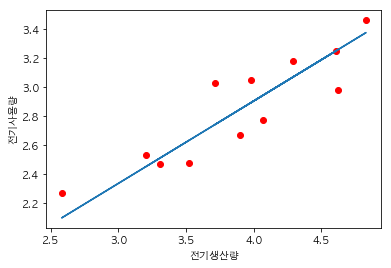

In [21]:
plt.plot(x, y, 'ro') # red, o
plt.plot(x, sess.run(weight) * x + sess.run(bias))
plt.xlabel("전기생산량")
plt.ylabel("전기사용량")
plt.show()

In [22]:
# 세션 종료
sess.close()

In [23]:
# MNIST 데이터
from tensorflow.examples.tutorials.mnist import input_data

# 데이터 다운로드에 많은 시간이 소요됨
mnist = input_data.read_data_sets("./data/mnist/", one_hot=True)

# 변수 설정
x = tf.placeholder(tf.float32, [None, 784])

# [이미지픽셀, 10차원]
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# cross-entropy 모델 설정(손실을 최소화시키는 함수)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(
-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# 학습비율을 0.5로 설정
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(\
cross_entropy)

# 경사하강법으로 모델 학습
# 텐서플로우가 각각의 변수를 비용을 줄이는 방향으로 조금씩 이동시키는 방법
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 1000번의 학습 실시
for i in range(1000):
    # 무작위로 100개씩 추출하여 학습
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
# 모델의 정확도
# argmax(y,1) 가장 증거값이 큰 라벨
# argmax(y_, 1) 가장 증거값이 큰 실제 라벨
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

# boolean 리스트를 float로 변환한 후 평균값 계산
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                   y_: mnist.test.labels}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
0.9159


In [24]:
import numpy as np

# MNIST data 로딩
mnist = input_data.read_data_sets("./data/mnist/", one_hot=False)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [25]:
# 파라미터
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# 인공신경망의 파라미터
n_hidden_1 = 256 # 첫번째 은닉층의 뉴런 갯수
n_hidden_2 = 256 # 두번째 은닉층의 뉴런 갯수
num_input = 784 # MNIST data input(img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [26]:
# 데이터 학습을 위한 입력 함수
input_fn = tf.estimator.inputs.numpy_input_fn(
x={'images': mnist.train.images}, y=mnist.train.labels,
batch_size=batch_size, num_epochs=None, shuffle=True)

In [27]:
# 인공신경망 설정 함수
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # 첫번째 은닉층 정의(256개의 뉴련)
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # 두번째 은닉층 정의(256개의 뉴런)
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # 출력층 정의
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

In [28]:
def model_fn(features, labels, mode):
    # 인공신경망 생성
    logits = neural_net(features)
    
    # 예측
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # 예측 모드일 경우 리턴
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode,
                                         predictions = pred_classes)
    
    # 손실함수(비용함수) 정의
    loss_op = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits = logits, labels = tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(
        learning_rate = learning_rate)
    train_op = optimizer.minimize(loss_op,
                                 global_step = tf.train.get_global_step())
    
    # 모델의 정확도 평가
    acc_op = tf.metrics.accuracy(labels = labels,
                                predictions = pred_classes)
    
    estim_specs = tf.estimator.EstimatorSpec(
    mode = mode,
    predictions = pred_classes,
    loss = loss_op,
    train_op = train_op,
    eval_metric_ops = {'accuracy': acc_op})
    return estim_specs

In [29]:
# Estimator : 모델을 설정하고 모델의 그래프를 그린 다음
# 모델에 대한 loss 함수를 정의하고
# Optimizer를 정의하여 loss 값의 최솟값을 찾는다.
# 그리고 prediction 값을 계산
# Estimator 생성
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/t2/gx8cvy6d2qsd2kjx3gxj__q80000gn/T/tmpjmvnyi4q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12fcd1668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
# 모델 학습
model.train(input_fn, steps=num_steps)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/t2/gx8cvy6d2qsd2kjx3gxj__q80000gn/T/tmpjmvnyi4q/model.ckpt.
INFO:tensorflow:loss = 2.4736204, step = 1
INFO:tensorflow:global_step/sec: 178.777
INFO:tensorflow:loss = 0.4635496, step = 101 (0.564 sec)
INFO:tensorflow:global_step/sec: 189.936
INFO:tensorflow:loss = 0.3062323, step = 201 (0.523 sec)
INFO:tensorflow:global_step/sec: 176.178
INFO:ten

In [31]:
# 모델 평가를 위한 입력함수 정의
input_fn = tf.estimator.inputs.numpy_input_fn(
x={'images': mnist.test.images}, y=mnist.test.labels,
batch_size = batch_size, shuffle=False)
# 평가 함수 호출
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-01T14:24:27Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/t2/gx8cvy6d2qsd2kjx3gxj__q80000gn/T/tmpjmvnyi4q/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-01-14:24:27
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9153, global_step = 1000, loss = 0.29185286
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/t2/gx8cvy6d2qsd2kjx3gxj__q80000gn/T/tmpjmvnyi4q/model.ckpt-1000


{'accuracy': 0.9153, 'loss': 0.29185286, 'global_step': 1000}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/t2/gx8cvy6d2qsd2kjx3gxj__q80000gn/T/tmpjmvnyi4q/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


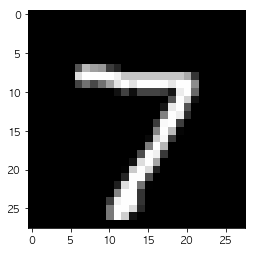

Model prediction: 7


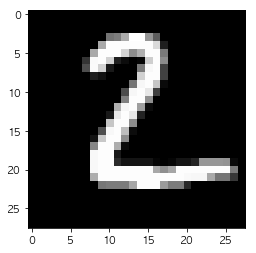

Model prediction: 2


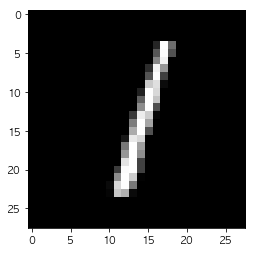

Model prediction: 1


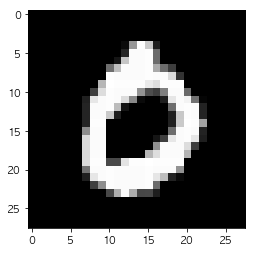

Model prediction: 0


In [32]:
# 이미지 예측
n_images = 4
# 검증용 데이터셋에서 이미지 선택
test_images = mnist.test.images[:n_images]
# 입력 데이터 준비
input_fn = tf.estimator.inputs.numpy_input_fn(
x={'images': test_images}, shuffle=False)
preds = list(model.predict(input_fn))

# 출력
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])